In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import seaborn.objects as so
from sklearn import preprocessing
label_encoder = preprocessing.LabelEncoder()

In [ ]:
df = pd.read_csv("tmdb-movies.csv")

In [ ]:
df.head()

,id,imdb_id,popularity,original_title,cast,homepage,director,tagline,keywords,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,monster|dna|tyrannosaurus rex|velociraptor|island,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/2015,5562,6.5,2015,137999939.3,1.392446e+09
1,76341,tt1392190,28.419936,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,future|chase|post-apocalyptic|dystopia|australia,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/2015,6185,7.1,2015,137999939.3,3.481613e+08
2,262500,tt2908446,13.112507,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,based on novel|revolution|dystopia|sequel|dyst...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/2015,2480,6.3,2015,101199955.5,2.716190e+08
3,140607,tt2488496,11.173104,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,android|spaceship|jedi|space opera|3d,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/2015,5292,7.5,2015,183999919.0,1.902723e+09
4,168259,tt2820852,9.335014,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,car race|speed|revenge|suspense|car,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/2015,2947,7.3,2015,174799923.1,1.385749e+09


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 19 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    10866 non-null  int64  
 1   imdb_id               10856 non-null  object 
 2   popularity            10866 non-null  float64
 3   original_title        10866 non-null  object 
 4   cast                  10790 non-null  object 
 5   homepage              2936 non-null   object 
 6   director              10822 non-null  object 
 7   tagline               8042 non-null   object 
 8   keywords              9373 non-null   object 
 9   overview              10862 non-null  object 
 10  runtime               10866 non-null  int64  
 11  genres                10843 non-null  object 
 12  production_companies  9836 non-null   object 
 13  release_date          10866 non-null  object 
 14  vote_count            10866 non-null  int64  
 15  vote_average       

In [ ]:
df.describe()

,id,popularity,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,10866.000000,10866.000000,10866.000000,10866.000000,10866.000000,10866.000000,1.086600e+04,1.086600e+04
mean,66064.177434,0.646441,102.070863,217.389748,5.974922,2001.322658,1.755104e+07,5.136436e+07
std,92130.136561,1.000185,31.381405,575.619058,0.935142,12.812941,3.430616e+07,1.446325e+08
min,5.000000,0.000065,0.000000,10.000000,1.500000,1960.000000,0.000000e+00,0.000000e+00
25%,10596.250000,0.207583,90.000000,17.000000,5.400000,1995.000000,0.000000e+00,0.000000e+00
50%,20669.000000,0.383856,99.000000,38.000000,6.000000,2006.000000,0.000000e+00,0.000000e+00
75%,75610.000000,0.713817,111.000000,145.750000,6.600000,2011.000000,2.085325e+07,3.369710e+07
max,417859.000000,32.985763,900.000000,9767.000000,9.200000,2015.000000,4.250000e+08,2.827124e+09


In [ ]:
df.isnull().sum()

id                         0
imdb_id                   10
popularity                 0
original_title             0
cast                      76
homepage                7930
director                  44
tagline                 2824
keywords                1493
overview                   4
runtime                    0
genres                    23
production_companies    1030
release_date               0
vote_count                 0
vote_average               0
release_year               0
budget_adj                 0
revenue_adj                0
dtype: int64

In [ ]:
print(df.isnull().sum()/len(df) * 100)
print(50*'*')

id                       0.000000
imdb_id                  0.092030
popularity               0.000000
original_title           0.000000
cast                     0.699429
homepage                72.979937
director                 0.404933
tagline                 25.989324
keywords                13.740107
overview                 0.036812
runtime                  0.000000
genres                   0.211669
production_companies     9.479109
release_date             0.000000
vote_count               0.000000
vote_average             0.000000
release_year             0.000000
budget_adj               0.000000
revenue_adj              0.000000
dtype: float64
**************************************************


In [ ]:
df.duplicated().sum()

1

In [ ]:
df["director"].unique()
unique_values = df['director'].nunique()
print(unique_values)

5067


In [ ]:
df["director"].value_counts()

Woody Allen                 45
Clint Eastwood              34
Martin Scorsese             29
Steven Spielberg            29
Ridley Scott                23
                            ..
Jeffrey Porter               1
Larry Shaw                   1
Bill Pohlad                  1
Andy Hamilton|Guy Jenkin     1
Harold P. Warren             1
Name: director, Length: 5067, dtype: int64

In [ ]:
labels_drop=["id","imdb_id","original_title","homepage","tagline","overview",]
for x in labels_drop:
  df.drop(x ,axis=1,inplace=True)

In [ ]:
print(df.isnull().sum()/len(df) * 100)
print(50*'*')

popularity               0.000000
cast                     0.699429
director                 0.404933
keywords                13.740107
runtime                  0.000000
genres                   0.211669
production_companies     9.479109
release_date             0.000000
vote_count               0.000000
vote_average             0.000000
release_year             0.000000
budget_adj               0.000000
revenue_adj              0.000000
dtype: float64
**************************************************


In [ ]:
df.drop_duplicates(inplace=True)

In [ ]:
df.dropna(subset=["production_companies"], inplace=True)

In [ ]:
df.dropna(subset=["keywords"], inplace=True)

In [ ]:
df.dropna()

,popularity,cast,director,keywords,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,32.985763,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,monster|dna|tyrannosaurus rex|velociraptor|island,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/2015,5562,6.5,2015,1.379999e+08,1.392446e+09
1,28.419936,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,George Miller,future|chase|post-apocalyptic|dystopia|australia,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/2015,6185,7.1,2015,1.379999e+08,3.481613e+08
2,13.112507,Shailene Woodley|Theo James|Kate Winslet|Ansel...,Robert Schwentke,based on novel|revolution|dystopia|sequel|dyst...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/2015,2480,6.3,2015,1.012000e+08,2.716190e+08
3,11.173104,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,J.J. Abrams,android|spaceship|jedi|space opera|3d,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/2015,5292,7.5,2015,1.839999e+08,1.902723e+09
4,9.335014,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,James Wan,car race|speed|revenge|suspense|car,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/2015,2947,7.3,2015,1.747999e+08,1.385749e+09
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10861,0.080598,Michael Hynson|Robert August|Lord 'Tally Ho' B...,Bruce Brown,surfer|surfboard|surfing,95,Documentary,Bruce Brown Films,6/15/1966,11,7.4,1966,0.000000e+00,0.000000e+00
10862,0.065543,James Garner|Eva Marie Saint|Yves Montand|Tosh...,John Frankenheimer,car race|racing|formula 1,176,Action|Adventure|Drama,Cherokee Productions|Joel Productions|Douglas ...,12/21/1966,20,5.7,1966,0.000000e+00,0.000000e+00
10863,0.065141,Innokentiy Smoktunovskiy|Oleg Efremov|Georgi Z...,Eldar Ryazanov,car|trolley|stealing car,94,Mystery|Comedy,Mosfilm,1/1/1966,11,6.5,1966,0.000000e+00,0.000000e+00
10864,0.064317,Tatsuya Mihashi|Akiko Wakabayashi|Mie Hama|Joh...,Woody Allen,spoof,80,Action|Comedy,Benedict Pictures Corp.,11/2/1966,22,5.4,1966,0.000000e+00,0.000000e+00


In [ ]:
df.iloc[:,1] = df.iloc[:,1].str.split('|')
df.iloc[:,3] = df.iloc[:,3].str.split('|')
df.iloc[:,5] = df.iloc[:,5].str.split('|')
df.iloc[:,6] = df.iloc[:,6].str.split('|')

In [ ]:
df['release_date']=pd.to_datetime(df['release_date'],dayfirst=True)
df['Day'] = df['release_date'].dt.day_name()
df['month'] = df['release_date'].dt.month


<ipython-input-9-a4c393acc4ab>:1: UserWarning: Parsing dates in MM/DD/YYYY format when dayfirst=True was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  df['release_date']=pd.to_datetime(df['release_date'],dayfirst=True)


In [ ]:
df["profit"]=df['revenue_adj']-df['budget_adj']

In [ ]:
df.drop('release_date',axis=1,inplace=True)
df.drop('revenue_adj',axis=1,inplace=True)
df.drop('budget_adj',axis=1,inplace=True)

In [ ]:
df.head()

,popularity,cast,director,keywords,runtime,genres,production_companies,vote_count,vote_average,release_year,Day,month,profit
0,32.985763,"[Chris Pratt, Bryce Dallas Howard, Irrfan Khan...",Colin Trevorrow,"[monster, dna, tyrannosaurus rex, velociraptor...",124,"[Action, Adventure, Science Fiction, Thriller]","[Universal Studios, Amblin Entertainment, Lege...",5562,6.5,2015,Sunday,9,1.254446e+09
1,28.419936,"[Tom Hardy, Charlize Theron, Hugh Keays-Byrne,...",George Miller,"[future, chase, post-apocalyptic, dystopia, au...",120,"[Action, Adventure, Science Fiction, Thriller]","[Village Roadshow Pictures, Kennedy Miller Pro...",6185,7.1,2015,Wednesday,5,2.101614e+08
2,13.112507,"[Shailene Woodley, Theo James, Kate Winslet, A...",Robert Schwentke,"[based on novel, revolution, dystopia, sequel,...",119,"[Adventure, Science Fiction, Thriller]","[Summit Entertainment, Mandeville Films, Red W...",2480,6.3,2015,Wednesday,3,1.704191e+08
3,11.173104,"[Harrison Ford, Mark Hamill, Carrie Fisher, Ad...",J.J. Abrams,"[android, spaceship, jedi, space opera, 3d]",136,"[Action, Adventure, Science Fiction, Fantasy]","[Lucasfilm, Truenorth Productions, Bad Robot]",5292,7.5,2015,Tuesday,12,1.718723e+09
4,9.335014,"[Vin Diesel, Paul Walker, Jason Statham, Miche...",James Wan,"[car race, speed, revenge, suspense, car]",137,"[Action, Crime, Thriller]","[Universal Pictures, Original Film, Media Righ...",2947,7.3,2015,Sunday,1,1.210949e+09


In [ ]:
df['Day']= label_encoder.fit_transform(df['Day'])

In [ ]:
df['director']= label_encoder.fit_transform(df['director'])

<ipython-input-15-bcdb08c31921>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df.corr()


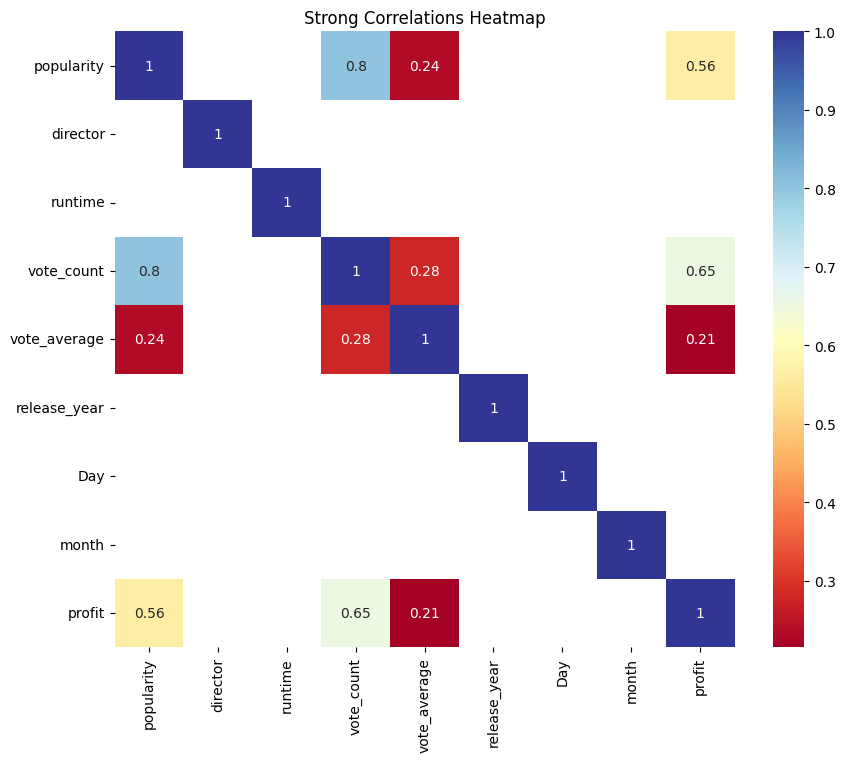

In [ ]:
# Calculate the correlation matrix
correlation_matrix = df.corr()

# Set the threshold for strong correlation
threshold = 0.2

# Filter strong correlations
strong_correlations = correlation_matrix[abs(correlation_matrix) > threshold]

# Generate the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(strong_correlations, annot=True, cmap='RdYlBu')
plt.title('Strong Correlations Heatmap')
plt.show()

In [ ]:
df['keywords'] = df['keywords'].apply(lambda x: ', '.join(map(str, x)) if isinstance(x, list) else '')

# Perform one-hot encoding on the flattened 'keywords' column
one_hot_encoded = df['keywords'].str.get_dummies(sep=', ').add_prefix('keywords')

# Concatenate the one-hot encoded columns with the original DataFrame
# df = pd.concat([df, one_hot_encoded], axis=1)

# Drop the original 'keywords' column
df = df.drop('keywords', axis=1)

In [ ]:
df['genres'] = df['genres'].apply(lambda x: ', '.join(map(str, x)) if isinstance(x, list) else '')

# Perform one-hot encoding on the flattened 'keywords' column
one_hot_encoded3 = df['genres'].str.get_dummies(sep=', ').add_prefix('genres')

# Concatenate the one-hot encoded columns with the original DataFrame
df = pd.concat([df, one_hot_encoded3], axis=1)

# Drop the original 'keywords' column
df = df.drop('genres', axis=1)

In [ ]:
df.head()

,popularity,cast,director,keywords,runtime,production_companies,vote_count,vote_average,release_year,Day,...,genresHistory,genresHorror,genresMusic,genresMystery,genresRomance,genresScience Fiction,genresTV Movie,genresThriller,genresWar,genresWestern
0,32.985763,"[Chris Pratt, Bryce Dallas Howard, Irrfan Khan...",795,"[monster, dna, tyrannosaurus rex, velociraptor...",124,"[Universal Studios, Amblin Entertainment, Lege...",5562,6.5,2015,3,...,0,0,0,0,0,1,0,1,0,0
1,28.419936,"[Tom Hardy, Charlize Theron, Hugh Keays-Byrne,...",1486,"[future, chase, post-apocalyptic, dystopia, au...",120,"[Village Roadshow Pictures, Kennedy Miller Pro...",6185,7.1,2015,6,...,0,0,0,0,0,1,0,1,0,0
2,13.112507,"[Shailene Woodley, Theo James, Kate Winslet, A...",3689,"[based on novel, revolution, dystopia, sequel,...",119,"[Summit Entertainment, Mandeville Films, Red W...",2480,6.3,2015,6,...,0,0,0,0,0,1,0,1,0,0
3,11.173104,"[Harrison Ford, Mark Hamill, Carrie Fisher, Ad...",1727,"[android, spaceship, jedi, space opera, 3d]",136,"[Lucasfilm, Truenorth Productions, Bad Robot]",5292,7.5,2015,5,...,0,0,0,0,0,1,0,0,0,0
4,9.335014,"[Vin Diesel, Paul Walker, Jason Statham, Miche...",1829,"[car race, speed, revenge, suspense, car]",137,"[Universal Pictures, Original Film, Media Righ...",2947,7.3,2015,3,...,0,0,0,0,0,0,0,1,0,0


In [ ]:
df.to_csv("test.csv")

In [ ]:
df['production_companies'] = df['production_companies'].apply(lambda x: ', '.join(map(str, x)) if isinstance(x, list) else '')

# Perform one-hot encoding on the flattened 'keywords' column
one_hot_encoded4 = df['production_companies'].str.get_dummies(sep=', ').add_prefix('production_companies')

# Concatenate the one-hot encoded columns with the original DataFrame
# df = pd.concat([df, one_hot_encoded4], axis=1)

# Drop the original 'keywords' column
df = df.drop('production_companies', axis=1)

In [ ]:
df['cast'] = df['cast'].apply(lambda x: ', '.join(map(str, x)) if isinstance(x, list) else '')

# Perform one-hot encoding on the flattened 'keywords' column
one_hot_encoded5 = df['cast'].str.get_dummies(sep=', ').add_prefix('cast')

# Concatenate the one-hot encoded columns with the original DataFrame
df = pd.concat([df, one_hot_encoded5], axis=1)

# Drop the original 'keywords' column
df = df.drop('cast', axis=1)

In [ ]:
df.to_csv("test2.csv")

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import PolynomialFeatures

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(df.drop(['profit'],axis=1), df['profit'], test_size=0.3, random_state=42)

In [ ]:
model = LinearRegression()

In [ ]:
model.fit(X_train, y_train)

LinearRegression()

In [ ]:
Y_pred= model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, Y_pred)

In [ ]:
print(f'Mean Squared Error: {mse}')

Mean Squared Error: 7.06513557796631e+30


In [ ]:
model.score(X_train,y_train)

0.9997851371120756

In [ ]:
from sklearn.metrics import accuracy_score
degree = 1
poly_features = PolynomialFeatures(degree=degree)
X_train_poly = poly_features.fit_transform(X_train)
X_test_poly = poly_features.fit_transform(X_test)

In [ ]:
poly_model = LinearRegression()
poly_model.fit(X_train_poly, y_train)

LinearRegression()

In [ ]:
Y_pred1 = poly_model.predict(X_test_poly)

In [ ]:
mse2 = mean_squared_error(y_test, Y_pred1)
print(f'Mean Squared Error: {mse2}')

Mean Squared Error: 7.526263041207281e+22


In [ ]:
poly_model.score(X_train_poly,y_train)

0.9997849762564192